### Single Layer Neural Network

In [1]:
import pandas as pd
import numpy as np
import h5py
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

### Load dataset

In [2]:
def load_data():

    train = h5py.File('./datasets/train_catvnoncat.h5')
    train_keys = [key for key in train.keys()]

    test = h5py.File('./datasets/test_catvnoncat.h5')
    test_keys = [key for key in test.keys()]

    print("Keys in train data : ",train_keys)
    print("Keys in test data : ",test_keys)

    classes = train['list_classes'].value

    original_train_x = train['train_set_x'].value
    original_train_y = train['train_set_y'].value

    original_test_x = test['test_set_x'].value
    original_test_y = test['test_set_y'].value

    print("Train data shape :",original_train_x.shape)
    print("Test data shape :",original_test_x.shape)
    print("Output values :",classes)

    return original_train_x,original_train_y,original_test_x,original_test_y

In [3]:
def prepare_data(train_X,train_y,test_X,test_y):
    
    train_X = train_X.reshape((train_X.shape[0],-1))
    test_X = test_X.reshape((test_X.shape[0],-1))

    train_X = train_X.T
    test_X = test_X.T
    train_y = train_y.reshape((1,train_y.shape[0]))
    test_y = test_y.reshape((1,test_y.shape[0]))
    
    print("train_X shape :",train_X.shape)
    print("train_y shape :",train_y.shape)
    print("test_X shape :",test_X.shape)
    print("test_y shape :",test_y.shape)
    
    return train_X,train_y,test_X,test_y

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def initialize_weights(train_X):
    w = np.zeros((train_X.shape[0],1)) * np.random.rand() *0.05
    b = 0
    return w,b

In [6]:
def forward_prop(train_X,train_y,w,b):

    z = np.dot(w.T,train_X) + b
    a = sigmoid(z)
    
    m = train_X.shape[1]
    
    loss = (train_y*np.log(a))+ ((1-train_y)*np.log(1-a))
    cost = -(1/m) * np.sum(loss)
    return z,a,cost

In [7]:
def gradient(w,b,dw,db,learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    return w,b

In [8]:
def back_prop(train_X,train_y,a):
    
    dz = a - train_y
    dw = np.dot(train_X,dz.T)
    db = np.sum(dz)
    
    return dz,dw,db

In [9]:
def model(train_X,train_y,iteration,learning_rate):
    
    w,b = initialize_weights(train_X)
    z,a,cost = forward_prop(train_X,train_y,w,b)
    dz,dw,db = back_prop(train_X,train_y,a)
    
    costs = []
    for i in range(iteration):
        
        w,b = gradient(w,b,dw,db,learning_rate)
        z,a,cost  = forward_prop(train_X,train_y,w,b)
        dz,dw,db = back_prop(train_X,train_y,a)
        
        if i%100==0:
            costs.append(cost)
            print("Iteration {} : {}".format(i,cost))
            
    dw = dw/train_X.shape[1]
    db = db/train_X.shape[1]
    
    return a,z,w,b,dw,db,costs

In [10]:
def predict(X,w,b):
    
#     print(w.shape)
#     print(X.shape)
    w = w.reshape((X.shape[0],1))
    z = np.dot(w.T,X) + b
    a = sigmoid(z)
    
    predicted_class = np.where(a>0.5,1,0)
    return a,predicted_class

In [11]:
def model_accuracy(a,y):
    print("Accuracy : {}%".format(accuracy_score(np.ravel(y),np.ravel(a))*100))

In [12]:
### Load data set
original_train_x,original_train_y,original_test_x,original_test_y = load_data()

Keys in train data :  ['list_classes', 'train_set_x', 'train_set_y']
Keys in test data :  ['list_classes', 'test_set_x', 'test_set_y']
Train data shape : (209, 64, 64, 3)
Test data shape : (50, 64, 64, 3)
Output values : [b'non-cat' b'cat']


In [13]:
### Reshape data(data preparation)
train_X,train_y,test_X,test_y = prepare_data(original_train_x,original_train_y,original_test_x,original_test_y)

train_X shape : (12288, 209)
train_y shape : (1, 209)
test_X shape : (12288, 50)
test_y shape : (1, 50)


In [14]:
## Normalize the values
train_X = train_X/255
test_X = test_X/255

In [15]:
a,z,w,b,dw,db,costs = model(train_X,train_y,iteration=3000,learning_rate=0.00003)

Iteration 0 : 0.8185233398072594
Iteration 100 : 0.9063136174858829
Iteration 200 : 0.6803390974260219
Iteration 300 : 0.5110283008756722
Iteration 400 : 0.38050551471152916
Iteration 500 : 0.28455582053955486
Iteration 600 : 0.24184189719160187
Iteration 700 : 0.22355738760893132
Iteration 800 : 0.2079945997852959
Iteration 900 : 0.19445985583126538
Iteration 1000 : 0.1825510674593202
Iteration 1100 : 0.1719795468858373
Iteration 1200 : 0.1625267697982908
Iteration 1300 : 0.1540220570536052
Iteration 1400 : 0.146329166775462
Iteration 1500 : 0.13933751899851993
Iteration 1600 : 0.1329561440085124
Iteration 1700 : 0.12710935690992675
Iteration 1800 : 0.12173358117894606
Iteration 1900 : 0.11677496439654833
Iteration 2000 : 0.1121875554386181
Iteration 2100 : 0.10793188883267571
Iteration 2200 : 0.10397387027156019
Iteration 2300 : 0.10028388874544018
Iteration 2400 : 0.0968361018053072
Iteration 2500 : 0.09360785487452847
Iteration 2600 : 0.09057920558191046
Iteration 2700 : 0.08773253

Text(0, 0.5, 'error')

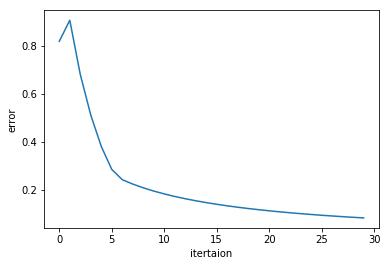

In [16]:
plt.plot(costs)
plt.xlabel("itertaion")
plt.ylabel('error')

In [17]:
train_predicted, train_predicted_class = predict(train_X,w,b)

In [18]:
### Train Accuracy
model_accuracy(train_predicted_class,train_y)

Accuracy : 99.52153110047847%


In [19]:
## Test accuracy and prediction
test_predicted, test_predicted_class = predict(test_X,w,b)

In [20]:
model_accuracy(test_predicted_class,test_y)

Accuracy : 70.0%
